# Extracting Embeddings From All Encoder Layers of BERT

We've extract the embeddings obtained from the final encoder layer of the pre-trained model. Now the question is, should we consider the embeddings 
obtained only from the final encoder layer (final hidden state), or should we also consider the embeddings obtained from all the encoder layers
(all hidden states)?

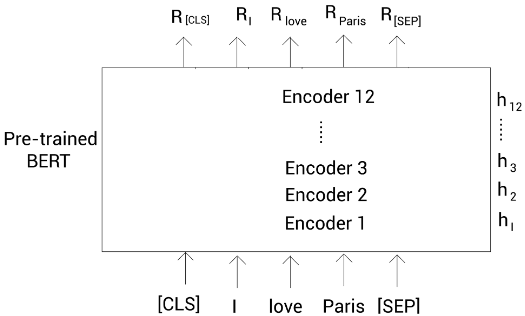

Instead of taking the embeddings (representations) only from the final encoder layer, the researchers of BERT have experimented with taking embeddings from different encoder layers.

For instance, for the NER task, the researchers have used the pre-trained BERT model to extract features. Instead of using the embedding only from the final encoder layer (final hidden layer) as a feature, they have experimented with using embeddings from other encoder layers (other hidden layers) as features and obtained the following F1 scor

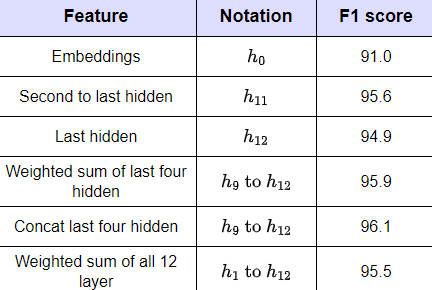

As we can observe from the preceding table, concatenating the embeddings of the last four encoder layers (the last four hidden layers) gives us a greater F1 score of 96.1%. Thus, instead of taking embeddings only from the final encoder layer (final hidden layer), we can also use embeddings from the other encoder layers.

Now, we will learn how to extract the embeddings from all the encoder layers using the transformers library.e:

In [1]:
# Suppressing "INFO" and "WARNING" messages by setting the verbosity of the Transformers library.
from transformers import logging
logging.set_verbosity_error()

# Import necessary libraries

In [2]:
from transformers import BertModel, BertTokenizer
import torch

# Download the pretrained BERT model 

Download the pre-trained BERT model and tokenizer. As we can see, while downloading the pre-trained BERT model, we need to set
output_hidden_states = True. Setting this to True helps us to obtain embeddings from all the encoder layers

In [3]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# preprocessing the Input

Let's consider the sentence: 'I love Paris'. First, we tokenize the sentence and add a [CLS] token at the beginning and a [SEP] token at the end

Suppose we need to keep the token length to 7. So, we add the [PAD] tokens and also define the attention mask

We convert tokens to their token IDs

We convert token_ids and attention_mask to tensors

In [4]:
sentence = 'I love Paris'
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']

In [5]:
tokens = tokens + ['[PAD]'] + ['[PAD]']
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]

In [6]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [7]:
print(tokens)
print(token_ids)

['[CLS]', 'i', 'love', 'paris', '[SEP]', '[PAD]', '[PAD]']
[101, 1045, 2293, 3000, 102, 0, 0]


In [8]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)

In [9]:
print(token_ids)
print(attention_mask)

tensor([[ 101, 1045, 2293, 3000,  102,    0,    0]])
tensor([[1, 1, 1, 1, 1, 0, 0]])


# Getting the embeddings

Since we set output_hidden_states = True while defining the model to get the embeddings from all the encoder layers, now the model returns an output 
tuple with three values

The value last_hidden_state, contains the representation of all the tokens obtained only from the final encoder layer (encoder 12).

The pooler_output indicates the representation of the [CLS] token from the final encoder layer, which is further processed by a linear and
tanh activation function.

The hidden_states contains the representation of all the tokens obtained from all the encoder layers.


In [10]:
objects = model(token_ids, attention_mask = attention_mask)
last_hidden_state = objects.last_hidden_state
pooler_output = objects.pooler_output 
hidden_states = objects.hidden_states

### The last_hidden_state property

Let's look at last_hidden_state. It holds the representation of all the tokens obtained only from the final encoder layer (encoder 12)

The size [1,7,768] indicates [batch_size, sequence_length, hidden_size] 

Our batch size is 1. The sequence length is the token length. Since we have 7 tokens, the sequence length is 7. The hidden size is the 
representation (embedding) size, and it is 768 for the BERT-base model

We can obtain the embedding of each token as follows:

The last_hidden[0][0] gives the representation of the first token, which is [CLS].

The last_hidden[0][1] gives the representation of the second token, which is I.

The last_hidden[0][2] gives the representation of the third token, which is love.

In [11]:
last_hidden_state.shape

torch.Size([1, 7, 768])

# The pooler_output property

We have pooler_output, which contains the representation of the [CLS] token from the final encoder layer, which is further processed by a linear and
tanh activation function. Let's print the shape of pooler_output:

The size [1,768] indicates [batch_size, hidden_size]
We learned that the token holds the aggregate representation of the sentence. Thus, we can use pooler_output as the representation of the sentence,
I love Paris.

In [12]:
pooler_output.shape

torch.Size([1, 768])

# The hidden_states property

Finally, we have hidden_states, which contains the representation of all the tokens obtained from all the encoder layers. It is a tuple containing
13 values holding the representation of all encoder layers (hidden layers), from the input embedding layer h0 to the final encoder layer h12

As we can see, it contains 13 values holding the representation of all layers:

The hidden_states[0] contains the representation of all the tokens obtained from the input embedding layer h0

The hidden_states[1] contains the representation of all the tokens obtained from the first encoder layer h1 

The hidden_states[2] contains the representation of all the tokens obtained from the second encoder layer h2

The hidden_states[12] contains the representation of all the tokens obtained from the final encoder layer h12


In [13]:
len(hidden_states)

13

In [14]:
hidden_states[0].shape

torch.Size([1, 7, 768])

In [15]:
hidden_states[1].shape

torch.Size([1, 7, 768])

In [16]:
hidden_states[2].shape

torch.Size([1, 7, 768])

In [18]:
print(hidden_states[9].shape)
print(hidden_states[9])

torch.Size([1, 7, 768])
tensor([[[ 7.3670e-02,  2.7802e-01, -4.6532e-01,  ..., -6.8014e-01,
           1.2422e-01,  6.8809e-01],
         [ 8.3667e-01,  5.7842e-01, -4.3332e-01,  ..., -2.9113e-01,
           1.5483e-01,  7.2985e-04],
         [ 1.4993e+00,  6.6219e-01,  4.6924e-01,  ..., -1.5683e-01,
           1.3537e-01, -4.9741e-02],
         ...,
         [ 1.9897e-03, -3.2837e-03,  1.8384e-02,  ..., -6.8616e-02,
          -5.1341e-02, -5.5890e-02],
         [ 2.5433e-01,  8.1925e-01,  2.3264e-01,  ...,  2.0128e-01,
           2.9325e-01, -7.4243e-01],
         [-1.9585e-01,  3.6785e-01,  2.2025e-01,  ...,  1.1274e-01,
          -2.1045e-02, -4.6833e-01]]], grad_fn=<NativeLayerNormBackward0>)


In [20]:
print(hidden_states[9][0])
print(hidden_stat

tensor([[ 7.3670e-02,  2.7802e-01, -4.6532e-01,  ..., -6.8014e-01,
          1.2422e-01,  6.8809e-01],
        [ 8.3667e-01,  5.7842e-01, -4.3332e-01,  ..., -2.9113e-01,
          1.5483e-01,  7.2985e-04],
        [ 1.4993e+00,  6.6219e-01,  4.6924e-01,  ..., -1.5683e-01,
          1.3537e-01, -4.9741e-02],
        ...,
        [ 1.9897e-03, -3.2837e-03,  1.8384e-02,  ..., -6.8616e-02,
         -5.1341e-02, -5.5890e-02],
        [ 2.5433e-01,  8.1925e-01,  2.3264e-01,  ...,  2.0128e-01,
          2.9325e-01, -7.4243e-01],
        [-1.9585e-01,  3.6785e-01,  2.2025e-01,  ...,  1.1274e-01,
         -2.1045e-02, -4.6833e-01]], grad_fn=<SelectBackward0>)